In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree, model_selection, ensemble
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, make_scorer

In [4]:
Train_data = pd.read_csv('../data/df_train_standardized_45_columns.csv', index_col = 0)
Test_data = pd.read_csv('../data/df_test_standardized_45_columns.csv', index_col = 0)

In [5]:
Train_data = Train_data.dropna()
Test_data = Test_data.dropna()

In [6]:
X_train, y_train = Train_data.drop(columns = ['y']), Train_data['y']
X_test, y_test = Test_data.drop(columns = ['y']), Test_data['y']

In [7]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1027, 45), (115, 45), (1027,), (115,))

# Random Forest

In [8]:
from sklearn.ensemble import RandomForestClassifier

## Building Baseline Model Using Default Parameter

In [12]:
from sklearn.model_selection import cross_val_score
base_forest = RandomForestClassifier(random_state = 1)

scores = cross_val_score(base_forest, X_train, y_train, cv=5, 
                        scoring=('accuracy'))

base_forest.fit(X_train,y_train)
y_pred = base_forest.predict(X_test)
accuracy_train = scores.mean()
accuracy_test = accuracy_score(y_test, y_pred)

print('Train accuracy', accuracy_train)
print('Test accuracy', accuracy_test)

Train accuracy 0.5891214776225432
Test accuracy 0.4956521739130435


## Paramter Tuning 

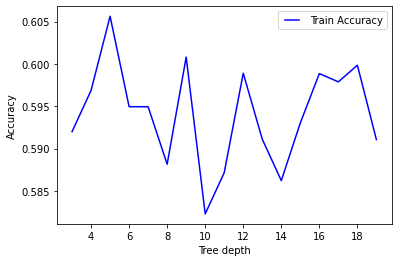

In [ ]:
# Tune max_depth
max_depths = np.arange(3,20, 1)
train_results = []

for max_depth in max_depths:
   rf = RandomForestClassifier(max_depth=max_depth, random_state = 1)
   scores = cross_val_score(rf, X_train, y_train, cv=5, 
                        scoring=('accuracy'))
   rf.fit(X_train,y_train)
   y_pred = rf.predict(X_test)
   
   train_acc = scores.mean()
   train_results.append(train_acc)
   
    
from matplotlib.legend_handler import HandlerLine2D
import matplotlib.pyplot as plt
line1, = plt.plot(max_depths, train_results, 'b', label='Train Accuracy')
#line2, = plt.plot(max_depths, val_results, 'r', label='Test Accuracy')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy')
plt.xlabel('Tree depth')
plt.show()

## max_depth = 5

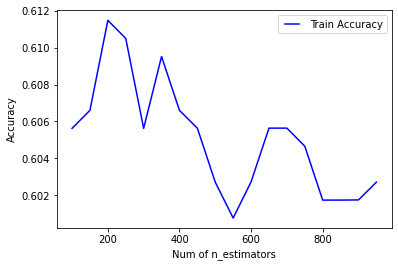

In [ ]:
# Tune n_estimator
n_estimators = np.arange(100,1000,50)
train_results = []

for n_estimator in n_estimators:
   rf = RandomForestClassifier(max_depth = 5, n_estimators = n_estimator, random_state = 1)
   scores = cross_val_score(rf, X_train, y_train, cv=5, 
                        scoring=('accuracy'))
   rf.fit(X_train,y_train)
   y_pred = rf.predict(X_test)
   
   train_acc = scores.mean()
   train_results.append(train_acc)
   
    
from matplotlib.legend_handler import HandlerLine2D
import matplotlib.pyplot as plt
line1, = plt.plot(n_estimators, train_results, 'b', label='Train Accuracy')
# line2, = plt.plot(n_estimators, val_results, 'r', label='Test Accuracy')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy')
plt.xlabel('Num of n_estimators')
plt.show()

# n_estimators = 200

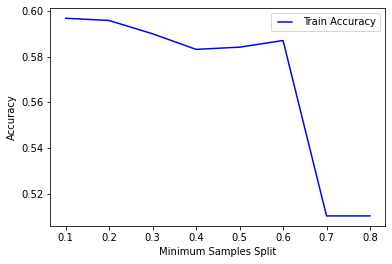

In [ ]:
min_sample_splits = np.arange(0.1,0.9,0.1)
train_results = []

for min_sample_split in min_sample_splits:
   rf = RandomForestClassifier(max_depth = 5, n_estimators = 200, min_samples_split=min_sample_split, random_state = 1)
   scores = cross_val_score(rf, X_train, y_train, cv=5, 
                        scoring=('accuracy'))
   rf.fit(X_train,y_train)
   y_pred = rf.predict(X_test)
   
   train_acc = scores.mean()
   train_results.append(train_acc)
    
from matplotlib.legend_handler import HandlerLine2D
import matplotlib.pyplot as plt
line1, = plt.plot(min_sample_splits, train_results, 'b', label='Train Accuracy')
# line2, = plt.plot(min_sample_splits, val_results, 'r', label='Val Accuracy')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy')
plt.xlabel('Minimum Samples Split')
plt.show()

# min_sample_split = 0.1

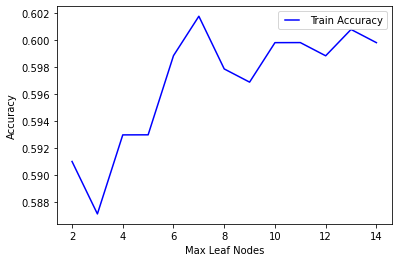

In [ ]:
# tune max_leaf_nodes
max_leaf_nodes = np.arange(2,15,1)
train_results = []

for max_leaf_node in max_leaf_nodes:
    rf = RandomForestClassifier(max_depth = 5, n_estimators = 200, 
                               min_samples_split = 0.1, max_leaf_nodes = max_leaf_node, random_state = 1)
    scores = cross_val_score(rf, X_train, y_train, cv=5, 
                        scoring=('accuracy'))
    rf.fit(X_train,y_train)
    y_pred = rf.predict(X_test)
    
    train_acc = scores.mean()
    train_results.append(train_acc)


line1, = plt.plot(max_leaf_nodes, train_results, 'b', label='Train Accuracy')
# line2, = plt.plot(max_leaf_nodes, val_results, 'r', label='Val Accuracy')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy')
plt.xlabel('Max Leaf Nodes')
plt.show()
# max_leaf_nodes = 7

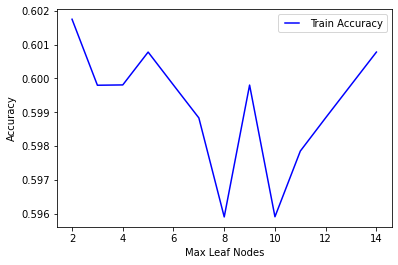

In [ ]:
# tune min_samples_leafs
min_samples_leafs = np.arange(2,15,1)
train_results = []

for min_samples_leaf in min_samples_leafs:
    rf = RandomForestClassifier(max_depth = 5, n_estimators = 200, 
                               min_samples_split=0.1, max_leaf_nodes = 7, 
                               min_samples_leaf = min_samples_leaf, random_state = 1)
    scores = cross_val_score(rf, X_train, y_train, cv=5, 
                        scoring=('accuracy'))
    rf.fit(X_train,y_train)
    y_pred = rf.predict(X_test)
    
    train_acc = scores.mean()
    train_results.append(train_acc)


line1, = plt.plot(max_leaf_nodes, train_results, 'b', label='Train Accuracy')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy')
plt.xlabel('Max Leaf Nodes')
plt.show()
# min_samples_leaf = 2

In [ ]:
## build model
model = RandomForestClassifier(max_depth = 5, n_estimators = 200, 
                               min_samples_split = 0.1, max_leaf_nodes = 7,
                              min_samples_leaf = 2, random_state = 1)

scores = cross_val_score(model, X_train, y_train, cv = 5, 
                        scoring=('accuracy'))

model.fit(X_train,y_train)
y_pred = model.predict(X_test)
accuracy_train = scores.mean()
accuracy_test = accuracy_score(y_test, y_pred)

print('Train accuracy', accuracy_train)
print('Test accuracy', accuracy_test)

Train accuracy 0.5968932038834952
Test accuracy 0.5478260869565217


In [ ]:
y_pred

array([1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1])

## Tree Visualization

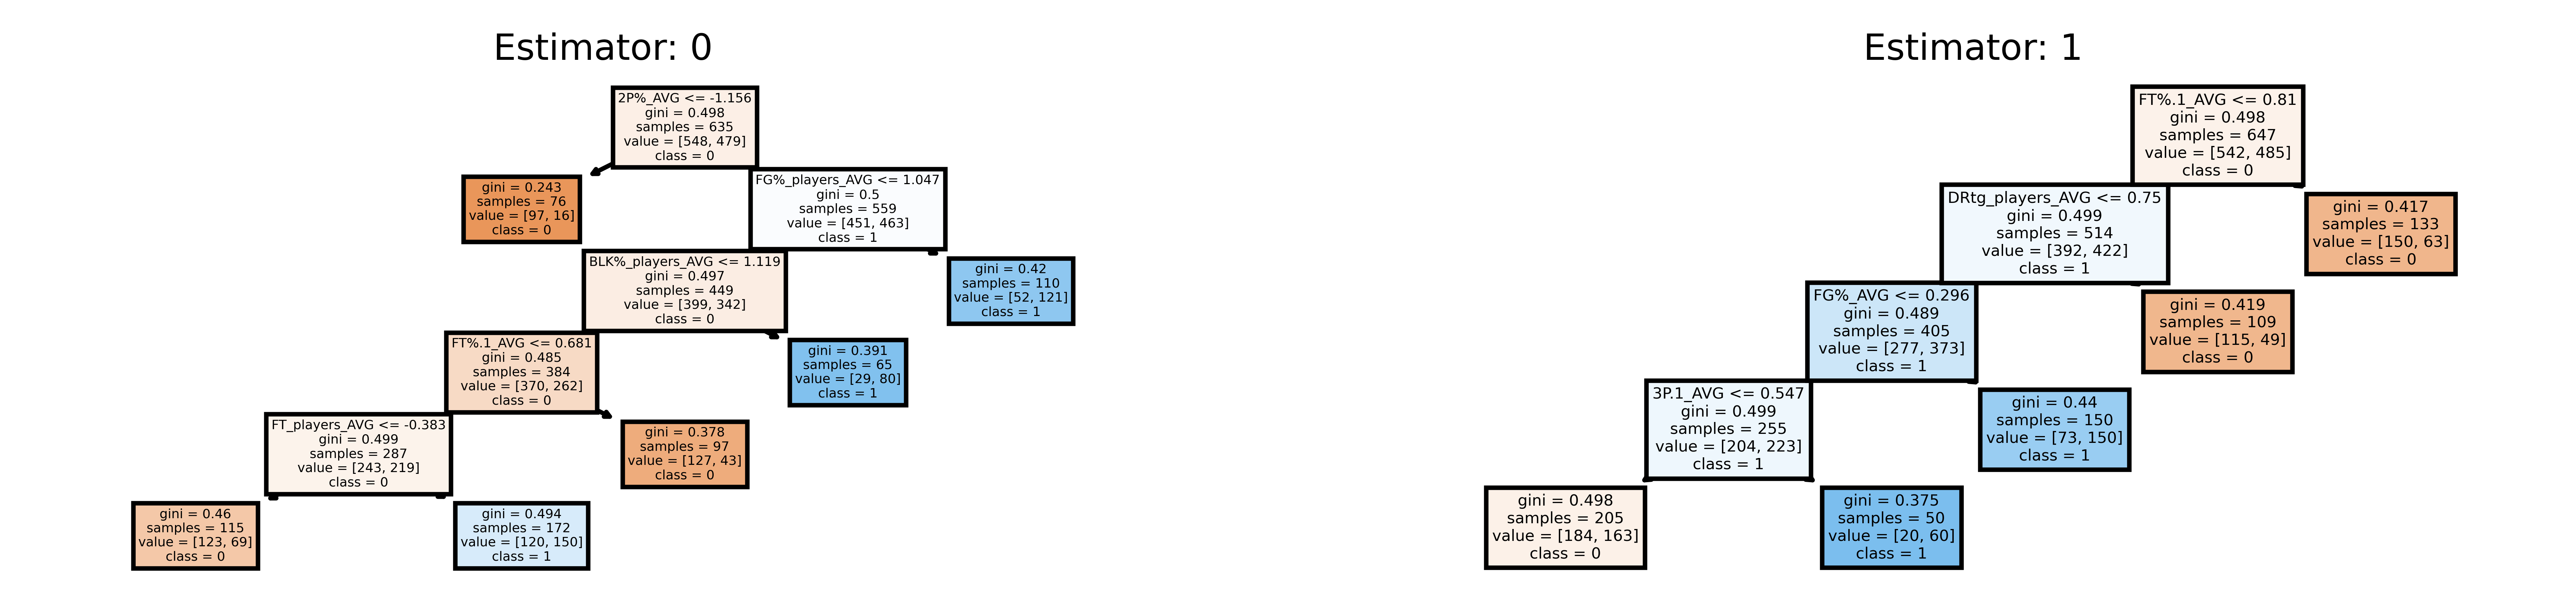

In [ ]:
fn = X_train.columns
cn = ['0', '1']
fig, axes = plt.subplots(nrows = 1,ncols = 2,figsize = (10,2), dpi=900)
for index in range(0, 2):
    tree.plot_tree(model.estimators_[index],
                   feature_names = fn, 
                   class_names=cn,
                   filled = True,
                   ax = axes[index]);

    axes[index].set_title('Estimator: ' + str(index), fontsize = 8)

## Explain with LIME

In [17]:
!pip3 install lime
import lime
import lime.lime_tabular

     |████████████████████████████████| 276kB 5.3MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-cp37-none-any.whl size=283846 sha256=c47fc2f71862a8176b5dad74f66a1f003f0552fe9887c901223888fc23240da9
  Stored in directory: /root/.cache/pip/wheels/4c/4f/a5/0bc765457bd41378bf3ce8d17d7495369d6e7ca3b712c60c89
Successfully built lime


In [23]:
predict_fn_rf = lambda x: rf.predict_proba(x).astype(float)
# Get the explanation for RandomForest
choosen_instance = X_test.iloc[[10]].values[0]
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names = X_train.columns, 
                                                   class_names=['loss', 'win'], discretize_continuous=True)

exp = explainer.explain_instance(choosen_instance, predict_fn_rf)
exp.show_in_notebook(show_all=False)